# UK Parliament Petition 302284

<https://petition.parliament.uk/petitions/302284>

In [1]:
import json
import os

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shijian
shijian.setup_Jupyter()

In [2]:
files = []
for r, d, f in os.walk('.'):
    for _file in f:
        if '.json' in _file:
            files.append(os.path.join(r, _file))

In [3]:
data = []
for _file in files:
    _datetime = os.path.splitext(os.path.basename(_file))[0]
    with open(_file) as f:
        count = json.load(f)['data']['attributes']['signature_count']
    data.append([_datetime, count])

df = pd.DataFrame(
    data,
    columns = [
        "datetime",
        "signatures"
    ]
)
df.index = pd.to_datetime(df["datetime"])
del df["datetime"]
df = df.sort_index()
df.tail()

,signatures
datetime,
2020-03-19 23:50:31+00:00,75221
2020-03-20 00:20:33+00:00,75509
2020-03-20 00:50:34+00:00,75701
2020-03-20 01:20:35+00:00,75865
2020-03-20 01:50:36+00:00,75979


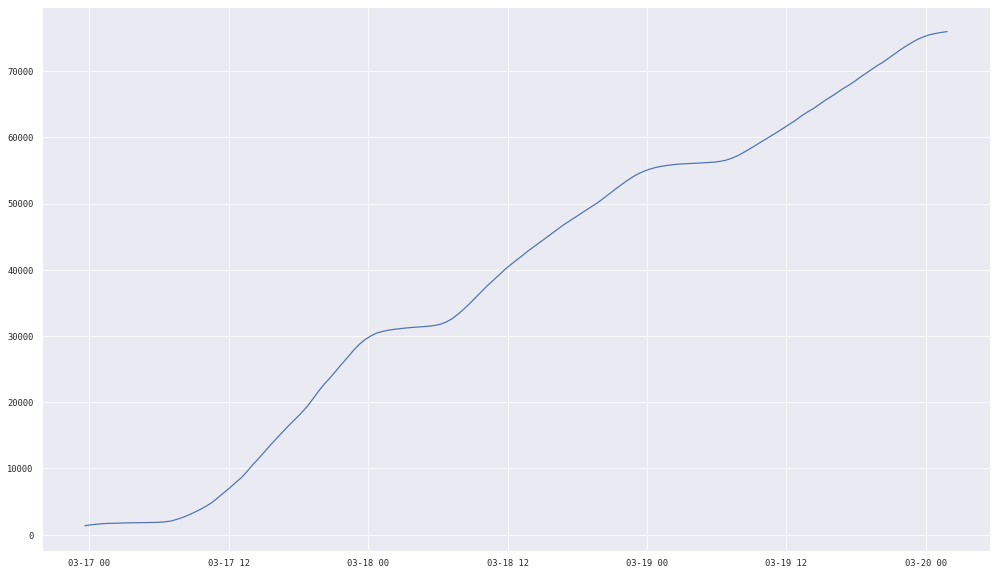

In [4]:
plt.plot(df.index, df["signatures"])
plt.show();

In [5]:
delta_hours         = (df.index[-1] - df.index[0]).total_seconds() / 3600 + 1
delta_signatures    = df["signatures"][-1] - df["signatures"][0]
signatures_per_hour = delta_signatures / delta_hours
signatures_per_hour

992.0327286556661

In [6]:
signatures_per_second = signatures_per_hour / (60 * 60)
signatures_per_second

0.27556464684879617

In [7]:
signatures_per_day = signatures_per_hour * 24
signatures_per_day

23808.785487735986

# time in days to 100000 signatures using linear projection

In [8]:
current_total_number_of_signatures = df.tail(n=1)['signatures'].values[0]
current_total_number_of_signatures

75979

In [9]:
#current_time = datetime.datetime.utcnow()
#current_time
last_time = df.tail(n=1).index.values[0]
last_time_UNIX = last_time.astype('datetime64[s]').astype('int')
last_time_UNIX

1584669036

In [10]:
# y = mx+c  
# signatures = signatures_per_second * current_time + c
c = current_total_number_of_signatures / (signatures_per_second * last_time_UNIX)
c

0.00017399288994437805

In [11]:
projected_time_seconds = (100000 - c) / signatures_per_second
projected_time_seconds

362891.252450383

In [12]:
projected_time_days = projected_time_seconds / 60 / 60 / 24
projected_time_days

4.200130236694247